# Preparação de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
dados = pd.read_csv('dados_tratados.csv')
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [3]:
# Remoção de colunas irrelevantes
dados.drop('customerID', axis=1, inplace=True)
print(dados.columns)

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [4]:
# Enconding
colunas_categoricas = dados.select_dtypes(include=['object']).columns
dados_encoded = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)
dados_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [5]:
dados_encoded.dropna(inplace=True)
dados_encoded.isnull().sum().sum()

np.int64(0)

In [6]:
# Verificação da proporção de evasão
print(dados_encoded['Churn_Yes'].value_counts(normalize=True))

Churn_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64


In [7]:
# Balanceamento de Classes
X = dados_encoded.drop('Churn_Yes', axis=1)
y = dados_encoded['Churn_Yes']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribuição após remover NAs e aplicar SMOTE:")
print(y_resampled.value_counts())

Distribuição após remover NAs e aplicar SMOTE:
Churn_Yes
False    5163
True     5163
Name: count, dtype: int64


In [8]:
# Padronização (col. numericas)
colunas_para_padronizar = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Total.Day']
scaler = StandardScaler()
dados_processados = dados_encoded.copy()
dados_processados[colunas_para_padronizar] = scaler.fit_transform(dados_encoded[colunas_para_padronizar])
dados_processados.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,-0.954296,0.039876,0.026652,-0.745607,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,-0.954296,-0.148964,-0.162819,-0.768063,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,-1.158016,0.179021,0.302548,-0.883456,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,-0.791321,1.003951,1.103642,-0.461240,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,-1.198760,0.805173,0.634952,-0.889390,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [9]:
# Balanceando as classes para dados_processados
X = dados_processados.drop('Churn_Yes', axis=1)
y = dados_processados['Churn_Yes']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print('Distribuição das classes após SMOTE:')
print(y_res.value_counts())

Distribuição das classes após SMOTE:
Churn_Yes
False    5163
True     5163
Name: count, dtype: int64


# Correlação e Seleção de Variáveis

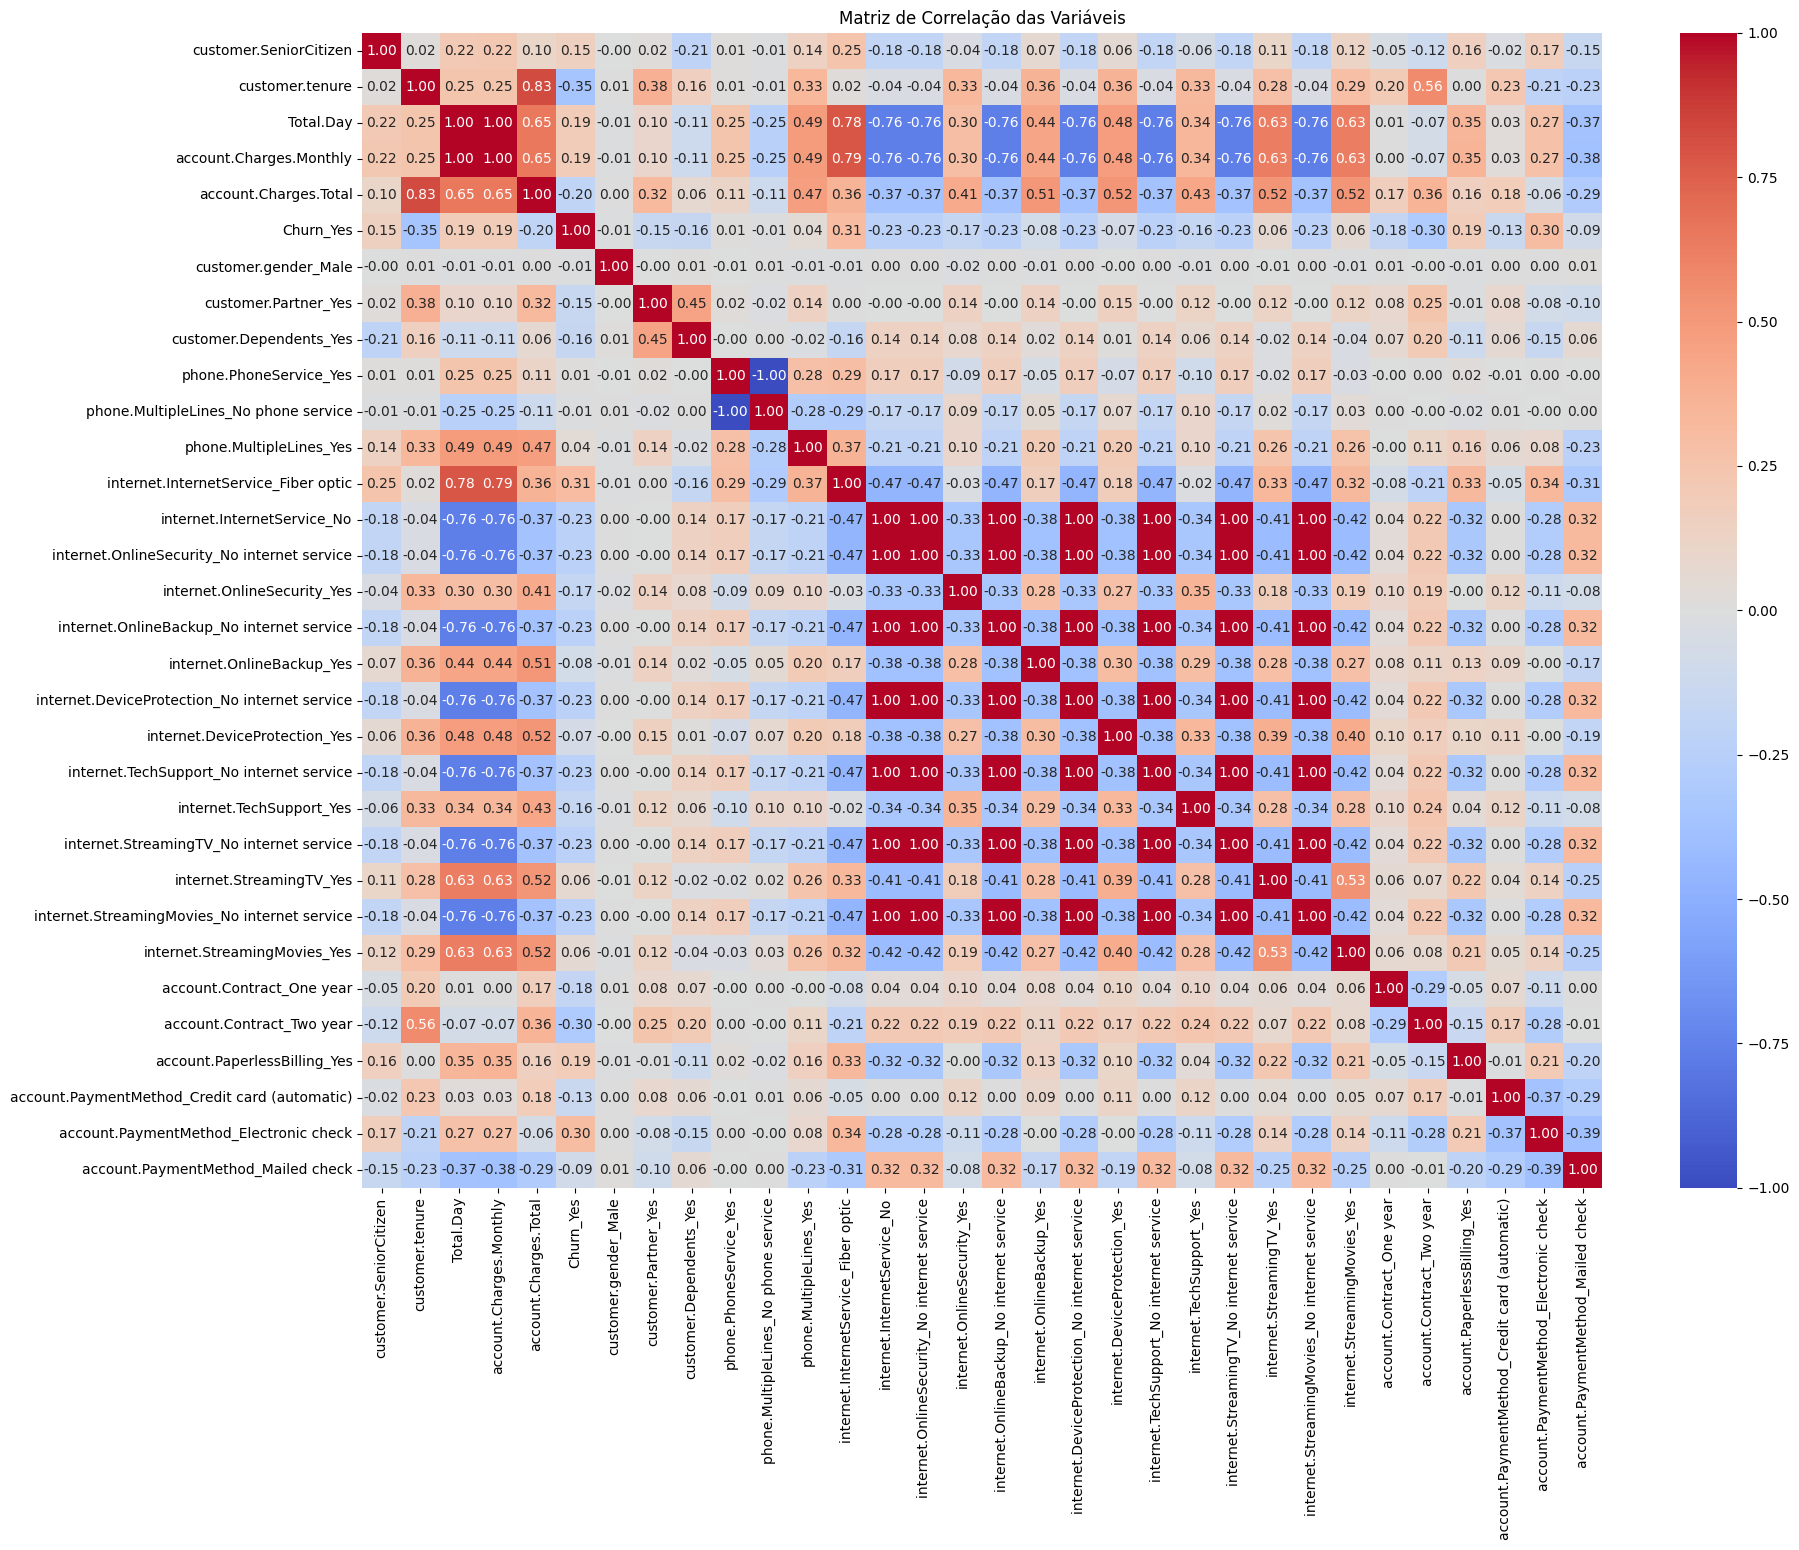

In [10]:
# Análise de Correlação
plt.figure(figsize=(20, 15))
sns.heatmap(dados_processados.corr(),
            xticklabels=dados_processados.corr().columns,
            yticklabels=dados_processados.corr().columns,
            cmap='coolwarm',
            annot=True,
            fmt='.2f')

plt.title('Matriz de Correlação das Variáveis')
plt.show()

In [11]:
# Calcula a correlação de todas as colunas com 'Churn_Yes'
correlacoes_churn = dados_processados.corr()['Churn_Yes'].abs()
correlacoes_ordenadas = correlacoes_churn.sort_values(ascending=False)
print("Correlação das variáveis com o Churn (da mais forte para a mais fraca):")
print(correlacoes_ordenadas)

Correlação das variáveis com o Churn (da mais forte para a mais fraca):
Churn_Yes                                        1.000000
customer.tenure                                  0.354049
internet.InternetService_Fiber optic             0.307463
account.Contract_Two year                        0.301552
account.PaymentMethod_Electronic check           0.301455
internet.OnlineBackup_No internet service        0.227578
internet.OnlineSecurity_No internet service      0.227578
internet.InternetService_No                      0.227578
internet.DeviceProtection_No internet service    0.227578
internet.TechSupport_No internet service         0.227578
internet.StreamingMovies_No internet service     0.227578
internet.StreamingTV_No internet service         0.227578
account.Charges.Total                            0.199484
account.Charges.Monthly                          0.192858
Total.Day                                        0.192030
account.PaperlessBilling_Yes                     0.191454


In [12]:
# Investigando variáveis específicas se relacionam com a evasão, como:
# Tempo de contrato × Evasão
fig = px.box(dados,
             x='Churn',
             y='customer.tenure',
             color='Churn',
             title='Distribuição do Tempo de Contrato (Tenure) por Churn',
             labels={'customer.tenure':'Tempo de Contrato (Meses)', 'Churn':'Cliente Saiu?'})
fig.show()

In [13]:
# Gasto Total vs. Churn
fig = px.box(dados,
             x='Churn',
             y='account.Charges.Total',
             color='Churn',
             title='Distribuição do Gasto Total por Churn',
             labels={'account.Charges.Total':'Gasto Total ($)', 'Churn':'Cliente Saiu?'})
fig.show()

# Modelagem Preditiva

In [14]:
# Separação de dados
# 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42
)

# Vamos verificar as dimensões dos conjuntos criados
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (7228, 31)
Dimensões de y_train: (7228,)
Dimensões de X_test: (3098, 31)
Dimensões de y_test: (3098,)


Para este desafio, foram selecionados dois modelos distintos: a Regressão Logística e o Random Forest. A Regressão Logística foi escolhida por ser um modelo linear, rápido e altamente interpretável, servindo como uma excelente linha de base. No entanto, ela é sensível à escala dos dados, pois variáveis com magnitudes maiores podem influenciar indevidamente o resultado. Por isso, a padronização dos dados é uma etapa de pré-processamento essencial para este modelo.

Em contrapartida, o Random Forest foi escolhido por ser um modelo mais complexo e robusto, conhecido por sua alta precisão e resistência a overfitting. Como é um modelo baseado em árvores de decisão, ele não é sensível à escala das variáveis, tornando a padronização opcional. Utilizar ambos nos permite comparar uma abordagem clássica com uma mais avançada e verificar qual se adapta melhor ao nosso problema de previsão de churn.

In [15]:
# Modelo de Regressão Logística
print("Treinando o modelo de Regressão Logística...")
modelo_logistica = LogisticRegression(random_state=42)
modelo_logistica.fit(X_train, y_train)
print("Modelo de Regressão Logística treinado com sucesso!")

Treinando o modelo de Regressão Logística...
Modelo de Regressão Logística treinado com sucesso!


In [16]:
# Modelo Random Forest
print("\nTreinando o modelo Random Forest...")
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
print("Modelo Random Forest treinado com sucesso!")


Treinando o modelo Random Forest...
Modelo Random Forest treinado com sucesso!


--- Avaliação do Modelo: Regressão Logística ---
Acurácia: 0.7841
Precisão: 0.7539
Recall: 0.8246
F1-Score: 0.7877


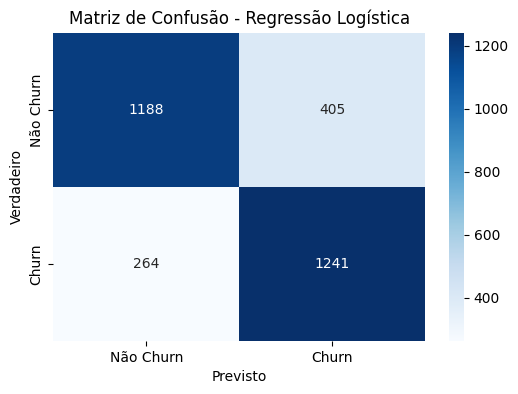

In [17]:
# Avaliação dos Modelos
y_pred_log = modelo_logistica.predict(X_test)

# Calcular as métricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("--- Avaliação do Modelo: Regressão Logística ---")
print(f"Acurácia: {acc_log:.4f}")
print(f"Precisão: {prec_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")

# Matriz de Confusão
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

--- Avaliação do Modelo: Random Forest ---
Acurácia: 0.8341
Precisão: 0.8068
Recall: 0.8658
F1-Score: 0.8353


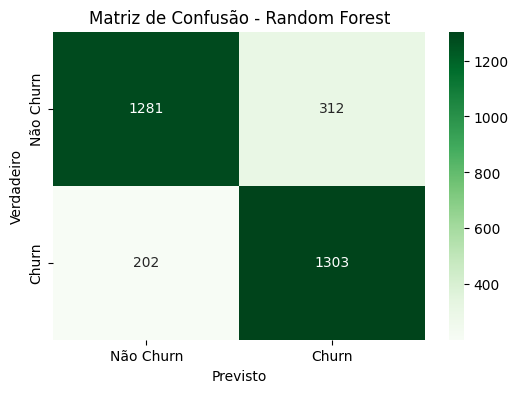

In [18]:
# --- Modelo 2: Random Forest ---

# Fazer previsões no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test)

# Calcular as métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("--- Avaliação do Modelo: Random Forest ---")
print(f"Acurácia: {acc_rf:.4f}")
print(f"Precisão: {prec_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Matriz de Confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Churn', 'Churn'],
            yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# Interpretação e Conclusão

In [19]:
# Análise do Modelo de Regressão Logística
# Criar um DataFrame com as variáveis e seus coeficientes
coeficientes = pd.DataFrame(modelo_logistica.coef_[0], X_res.columns, columns=['Coeficiente'])
coeficientes_ordenados = coeficientes.sort_values('Coeficiente', ascending=False)
print("Principais Fatores que Aumentam o Churn (Regressão Logística):")
print(coeficientes_ordenados.head(5))
print("\nPrincipais Fatores que Reduzem o Churn (Regressão Logística):")
print(coeficientes_ordenados.tail(5))

Principais Fatores que Aumentam o Churn (Regressão Logística):
                                      Coeficiente
internet.InternetService_Fiber optic     6.998150
internet.StreamingTV_Yes                 2.754860
internet.StreamingMovies_Yes             2.736649
phone.PhoneService_Yes                   2.369744
phone.MultipleLines_Yes                  1.702564

Principais Fatores que Reduzem o Churn (Regressão Logística):
                                               Coeficiente
internet.DeviceProtection_No internet service    -1.001748
account.Contract_Two year                        -1.234881
customer.tenure                                  -1.705983
phone.MultipleLines_No phone service             -1.971434
account.Charges.Monthly                          -6.995676


--- Random Forest: Importância das Variáveis ---
                                        Importância
customer.tenure                            0.165078
account.Charges.Total                      0.149266
account.Charges.Monthly                    0.118246
Total.Day                                  0.106878
account.Contract_Two year                  0.056875
account.PaymentMethod_Electronic check     0.044382
internet.InternetService_Fiber optic       0.040618
account.Contract_One year                  0.026855
account.PaperlessBilling_Yes               0.026608
customer.gender_Male                       0.021772


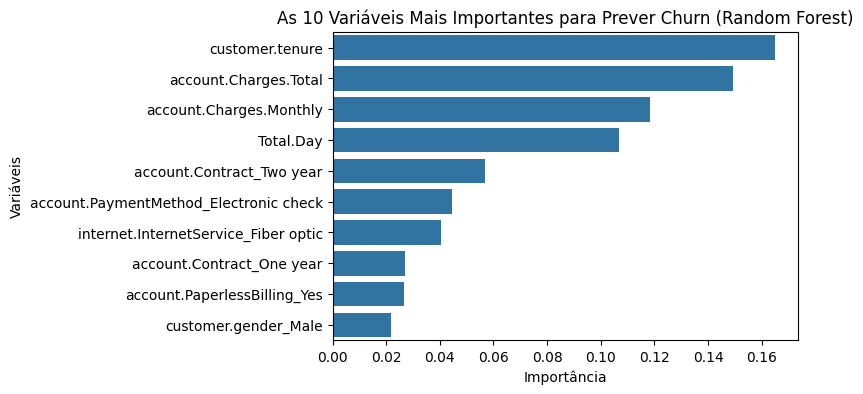

In [20]:
# Análise do Modelo Random Forest
importancia_features = pd.DataFrame(modelo_rf.feature_importances_,
                                   index = X_res.columns,
                                   columns=['Importância']).sort_values('Importância', ascending=False)

print("--- Random Forest: Importância das Variáveis ---")
print(importancia_features.head(10))

plt.figure(figsize=(6, 4))
sns.barplot(x=importancia_features['Importância'].head(10), y=importancia_features.head(10).index)
plt.title('As 10 Variáveis Mais Importantes para Prever Churn (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

# Relatório

## Principais Fatores que Influenciam o Churn

A análise de ambos os modelos, com destaque para o Random Forest, revelou os seguintes fatores como os mais determinantes para a evasão de clientes:

1.  **Tipo de Contrato (Contract):** Este é o fator de maior impacto. Clientes com contratos **mensais (Month-to-month)** têm uma probabilidade drasticamente maior de cancelar em comparação com aqueles com contratos de 1 ou 2 anos. A flexibilidade do contrato mensal facilita a saída do cliente.

2.  **Tempo de Contrato (Tenure):** Clientes com **menor tempo de permanência** são muito mais propensos a cancelar. A taxa de churn é mais alta nos primeiros meses e diminui consideravelmente à medida que o cliente permanece mais tempo na empresa, indicando que a fidelidade aumenta com o tempo.

3.  **Serviço de Internet (Internet Service):** Clientes que utilizam o serviço de **Fibra Óptica** apresentam uma taxa de churn mais elevada. Embora seja um serviço premium, isso pode indicar problemas de instabilidade, percepção de custo-benefício ou forte concorrência nesse segmento.

4.  **Método de Pagamento (Payment Method):** O uso de **Cheque Eletrônico** como forma de pagamento está fortemente correlacionado com o churn. Isso pode sinalizar uma menor conveniência no processo de pagamento ou um perfil de cliente menos comprometido.

5.  **Serviços Adicionais de Segurança e Suporte:** A ausência de serviços como **Segurança Online** (`OnlineSecurity_No`) e **Suporte Técnico** (`TechSupport_No`) também são fortes indicadores de um cliente propenso a cancelar. Clientes que não contratam esses serviços de proteção podem se sentir mais vulneráveis a problemas e menos engajados com a empresa.

## Recomendações Estratégicas para Redução de Churn

Com base nos fatores identificados, recomendamos as seguintes ações estratégicas:

1.  **Fidelizar Clientes com Contratos Mensais:**

      * **Ação:** Criar campanhas de marketing direcionadas para clientes com contratos mensais, oferecendo descontos ou benefícios exclusivos para a migração para planos de 1 ou 2 anos.
      * **Justificativa:** Contratos de longo prazo são o principal fator de retenção. Aumentar a adesão a esses planos reduzirá diretamente a taxa de churn.

2.  **Melhorar a Experiência Inicial do Cliente:**

      * **Ação:** Desenvolver um programa de *onboarding* para novos clientes, com foco nos primeiros 3 a 6 meses. Isso pode incluir um acompanhamento proativo da equipe de sucesso do cliente, guias de utilização dos serviços e ofertas especiais de boas-vindas.
      * **Justificativa:** O maior risco de churn está nos primeiros meses. Um bom início de relacionamento pode aumentar significativamente a retenção a longo prazo.

3.  **Investigar e Otimizar o Serviço de Fibra Óptica:**

      * **Ação:** Realizar uma análise aprofundada da satisfação dos clientes de fibra óptica. Verificar a estabilidade da rede, a competitividade dos preços e a qualidade do suporte técnico oferecido para este serviço.
      * **Justificativa:** Sendo um serviço premium, a alta taxa de churn neste segmento é um alerta. Melhorar a experiência pode transformar esses clientes em promotores da marca.

4.  **Incentivar Métodos de Pagamento Automáticos:**

      * **Ação:** Oferecer pequenos descontos ou benefícios para clientes que mudarem do pagamento via cheque eletrônico para débito automático ou cartão de crédito.
      * **Justificativa:** Clientes com pagamentos automatizados tendem a ter um relacionamento mais estável e duradouro com a empresa.

5.  **Promover Pacotes de Serviços de Segurança e Suporte:**

      * **Ação:** Criar ofertas de pacotes que incluam serviços como "Segurança Online" e "Suporte Técnico" por um valor atrativo. Comunicar ativamente os benefícios desses serviços para a tranquilidade e segurança do cliente.
      * **Justificativa:** Clientes que contratam mais serviços têm um maior "custo de troca" e se sentem mais amparados pela empresa, diminuindo a probabilidade de churn.